<a href="https://colab.research.google.com/github/cykrr/ada/blob/master/Heap_Sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heap Sort

## 1. Descripción del problema de ordenamiento


Dada como entrada una secuencia de $n$ elementos $A[A_0, ...,  A_n]$, buscamos
como salida una permutación de la entrada, llámese $B[B_0, ..., B_n]$ de manera
que se cumpla que:

$$
B_0 \leq B_1 \leq ... \leq B_n
$$

Donde cada elemento $A_n$ tiene una correspondencia a un único elemento $B_n$.


## 2. Descripción del algoritmo

El algoritmo **HeapSort**, como bien podría uno intuir con su nombre, soluciona
el problema de ordenamiento reposicionando los elementos del arreglo con la
estructura de un montículo binario (Heap). Donde cada nodo padre en la posición
$p$ tiene sus hijos en las posiciones $L: 2p + 1$ y $R: 2p + 2$. Siendo $L$ el
hijo izquierda y $R$ el hijo derecha.


### 2.1 Sub-rutina reubicar

La sub-rutina reubicar es clave ya que se utiliza para la creación y
posterior mantenimiento del montículo de máximos. Su funcionamiento consiste en
reubicar un elemento en el montículo a su posición correspondiente en el
montículo de máximos comparando el elemento a reubicar
con sus hijos. En el caso de que uno de sus dos hijos sea mayor que su padre, estos intercambiarán su posición y el elemento intercambiado será nuevamente reposicionado.

#### 2.1.1 Ejemplo reubicar

Dado un arreglo $K: [1,3,2,4,5]$ el reposicionamiento del primer elemento
consiste en:

Intercambiar posición con el hijo mayor. En este caso $3$. Lo cual da lugar al
arreglo $K[3,1,2,4,5]$.

Sin embargo el elemento $1$ todavía no está en su posición correspondiente. Pues
todavía tiene un hijo mayor que él ($5$). Así que volvemos a realizar el proceso
correspondiente, intercambiando el $5$ con el $1$. Dando como resultado el
arreglo $K'[3,5,2,4,1]$.


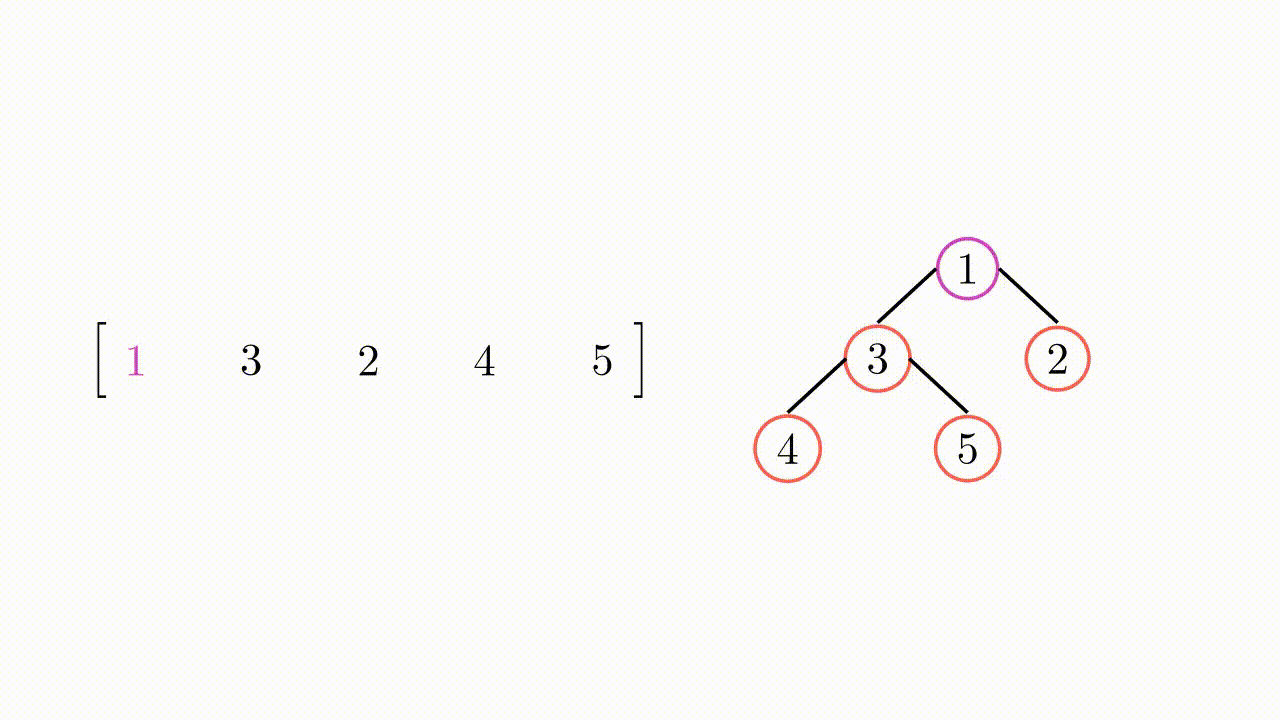

### 2.2 Creación del montículo de máximos (maxHeap)


El primer paso del algoritmo consiste en crear un montículo de máximos dentro
del arreglo $A$.

Para lograr esto el algoritmo se posiciona en el último nodo padre. Esta
posición es elegida estratégicamente para reducir el tiempo de ejecución del
algoritmo. Esto es debido a que el reposicionamiento del padre implica que los
hijos también serán reposicionados en casos de ser mayores que su padre,
ahorrándonos un par de iteraciones.

La posición de este elemento es fácilmente calculable por medio de la ecuación

$$
\textit{LastParent} = round(n/2) - 1
$$

Una vez calculado este valor recorremos el arreglo desde la posición
$LastParent$ hasta $0$ y reposicionamos el elemento correspondiente.


Dado un arreglo $K[3,1,2,4,5]$ se aplica el algoritmo maxHeap.

1. Calculamos el valor de $LastParent$.

   Sabiendo que el largo del arreglo es $n = 5$. Podemos deducir que la posición
   del último padre $n//2 -1 = 1$.

2. Reubicación de los elementos

   Reubicamos el elemento $K_\text{LastParent} = 1$. (No se describirá el
   proceso nuevamente. Ante cualquier duda refiérase a la sección
   _Ejemplo de la sub-rutina reubicar.) Lo que
   genera el arreglo $K[3,5,2,4,1]$

   Repetimos el proceso para el elemento $K_{LastParent-1} = K_0$. Pasando por los
   arreglos $K[5,3,2,4,1]$ y finalmente $K'[5,4,2,3,1]$. Siendo $K'$ el
   montículo máximo resultante.




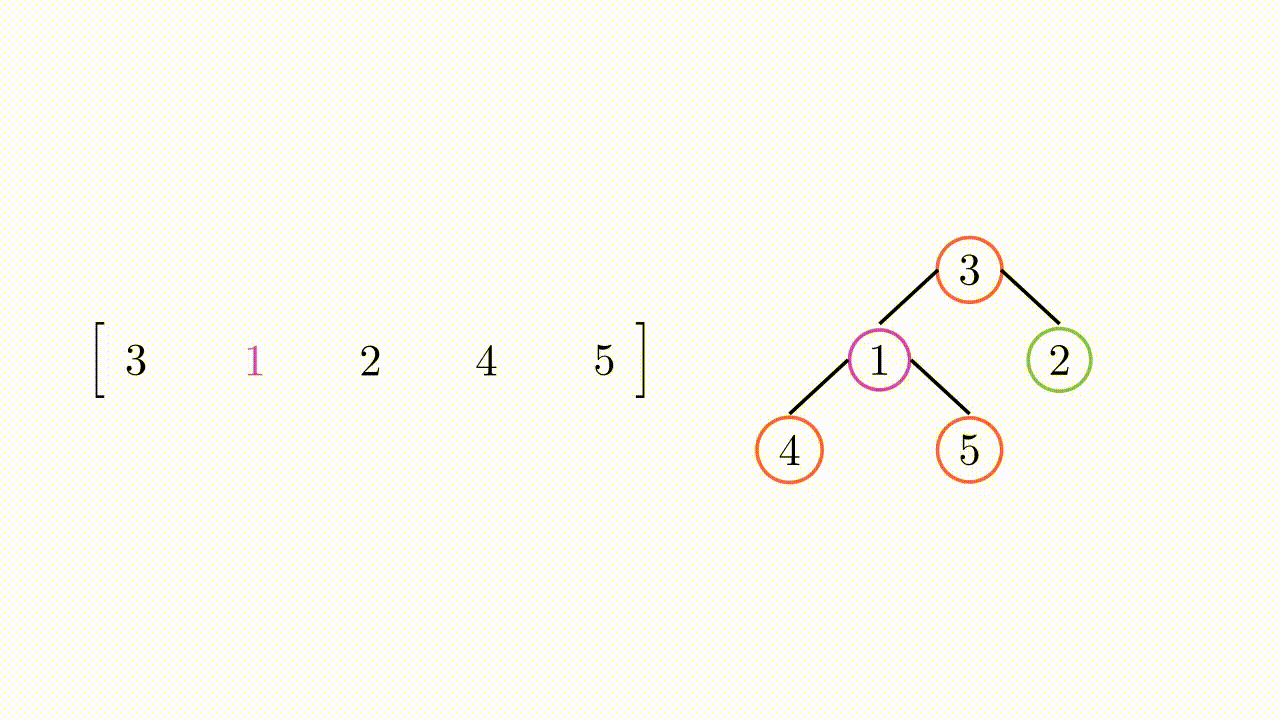

### 2.3 Mantenimiento del montículo

Una vez generado el montículo de máximos  en la raíz se halla el último elemento del arreglo de salida (pues es el elemento máximo del árbol). En este punto se repite el siguiente algoritmo:

* cambiar el primer y el último elemento del Heap
* Reducir en 1 el tamaño del heap.
* reubicar el primer elemento para recuperar el montículo de máximos

Se reduce el tamaño del Heap puesto que al final del arreglo se inicia a formar el arreglo ordenado
$B$. Para eventualmente  formar la totalidad de este.

Por ejemplo para el montículo $M[5,4,2,3,1]$:

Se intercambia posición entre el primer y el último elemento. Formando $M[\color {blue} 1,
\color {red} 4, \color {red} 2, \color {reset} 3,\color {green} 5 
\color {reset}]$

Se reubica el primer elemento:

Como la nueva raíz es menor que alguno de sus hijos. Se intercambia con el mayor. En este caso, $4$. Formando
$M[4,\color {blue}1 , 2, \color {red}3, \color {green} 5 
\color {reset} ]$

El elemento $1$ sigue siendo menor que su único hijo, así que es intercambiado con el elemento $\color {red}3$. Formando
$
M[4,3,2,1, \color {green}5 
 \color {reset}
 ]$.

Con esto termina la reubicación del elemento $1$.

Para continuar se vuelve a intercambiar el elemento
máximo con el último elemento del montículo. De nuevo el elemento $1$. Formando 
$M[ \color {blue}1,\color {red}3, \color{red}2,\color {green}4, \color {green}5]$.

Se vuelve a reubicar el primer elemento.

Se intercambia posición con el hijo mayor. En este caso $3$.
Formando $M[\color {blue}3, \color {red}1, \color {red} 2, \color {green}4, \color {green}5]$

La posición del mayor elemento es intercambiada con el último. En este caso, 2. Formando $M[\color {blue}2,
\color {red}1, \color {green} 3, \color{green}4, \color {green}5]$

Luego de cambiar el 3 con el 2, se debe verificar que el nuevo nodo raíz (2) sea mayor a sus hijos, en este caso el nodo 1. Esto se cumple, dando por finalizada esta iteración

Con esto concluye la ejecución del algoritmo pues el último elemento estará siempre ordenado. Entregando como resultado $\color {green} {[1,2,3,4,5]}$

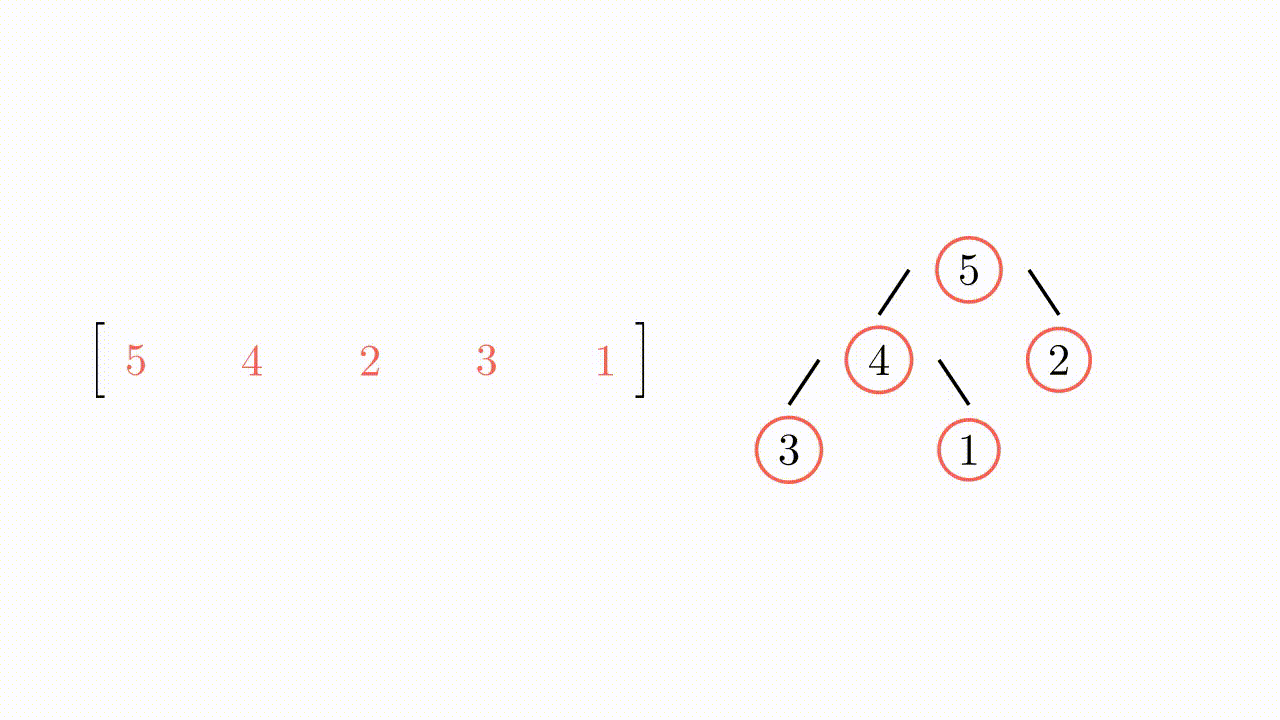

## 3. Implementación del algoritmo

In [ ]:
#@markdown Código Heap Sort
from termcolor import cprint

def highlight_print(arr, a,b, indent = 0):
    print (" "*indent * 4 +"[", end = " ")
    for i in range (len(arr)):
        if i != len(arr) -1: toEnd = ", "
        else: toEnd = ""
        if i == a or i == b:
          cprint (arr[i], "blue", end = toEnd)
        else: print(arr[i], end = toEnd)
    print("]")

def max_heap(
        arr, verbose = False, count = False
        ):
    """
    Reposiciona los elementos de  arr de forma
    que la permutación de elementos formen un
    montículo de máximos.

    Parameters:
    ---
    arr: Arreglo a permutar
    verbose: Imprimir detalles?
    compare: Contar comparaciones?
    """
    compareCount = 0

    # Desde el ultimo elemento padre hacia atrás
    # Reubicamos para formar el maxHenap

    for i in range(len(arr) // 2  - 1, -1, -1):
        if verbose: print("    Reubicando el padre", arr[i], "en la posición",i)
        compareCount += reubicar(arr, i, verbose = verbose, level = 1, count = count)
        if verbose and compareCount == 0: print("No se hizo nada")
    return compareCount

def reubicar(
        arr,
        i,
        longitud = -1,
        verbose = False, count = False,
        level = 0
        ):
    """
    Reubica un elemento "i" en el montículo
    ubicado en el subarreglo "arr" de longitud
    "n".

    Parameters:
    ---
    arr: Arreglo
    i: Posición del elemento a reubicar
    n: longitud del subarreglo
    verbose: switch de print detallado

    level: (interno) Nivel de recursión

    """

    compareCount = 0

    # Si recibimos la opción predeterminada es
    # porque queremos todo el arreglo
    if longitud == -1:
        longitud = len(arr)

    mayor = i # Iteramos desde la raíz

    left = 2*i + 1 # Hijo izq
    right = 2*i + 2 # Hijo der

    # Si alguno de los hijos sobrepasa el límite
    # del subarreglo entonces los desactivamos
    # para no guardarlos

    if left >= longitud:
        left = -1
    if right >= longitud:
        right = -1

    # El mayor es el hijo izquierdo?
    if left != -1 and arr[left] > arr[mayor]:
        mayor = left

    # El mayor es el hijo derecho?
    if right != -1 and arr[right] > arr[mayor]:
        mayor = right

    # Si el mayor no es la raiz, la reubicamos y
    # reposicionamos la nueva raiz
    if mayor != i:
#        print(arr[i], "no es el mayor, el mayor es", arr[mayor])
        if verbose: print(" " * 4 * level + "Se intercambia con el hijo", end = " ")
        if verbose: 
          if mayor == left:
            print ("izq:")
          else: print ("der:")

        if verbose: highlight_print(arr, i, mayor, indent = level)
        arr[mayor], arr[i] = arr[i], arr[mayor]
        if verbose: highlight_print(arr, i, mayor, indent = level)
        if count: compareCount+=1
        compareCount += reubicar(arr, mayor, longitud,
            verbose, level = level+1, count = count)
    return compareCount
#      if verbose: print("No se hicieron modificaciones")

def heap_sort(arr, verbose = False, count = False):
    """
    Ordena un arreglo arr por medio del algoritmo
    heap sort.
    """
    compareCount = 0
    if verbose: print("Entrada:", arr)
    longitud = len(arr)
    if verbose: print("Generando montículo de máximos:\n---")

    compareCount += max_heap(arr, verbose = verbose, count = count)

    if verbose: print("montículo generado exitosamente:\n---")
    if verbose: print(arr)
    ## Contador de elementos ordenados
    sorted_count = 0

    # Hasta el penultimo elemento pues el último estará
    # automáticamente ordenado
    for limit in range(len(arr)-1, 0, -1):
        if verbose: print("Se intercambia el primer elemento" +
                          "con el elemento en la posición",
                          limit)
        if verbose: highlight_print(arr,0,limit)

        # swap del ultimo elemento con el primero
        arr[0] , arr[limit] = \
                arr[limit], arr[0]

        if verbose: highlight_print(arr, 0, limit)

        if verbose: print("Reubicando el primer elemento")
        # Reubicar nueva raiz en el subarreglo
        compareCount += reubicar(arr, 0, longitud - sorted_count - 1,
                verbose, level = 1, count = count)
        if verbose: print ("MONTICULO RECUPERADO")
        sorted_count +=1
    if verbose: print("Fin del algoritmo")
    return arr, compareCount


## 4. Ejemplo de ejecución

In [ ]:
heap_sort([5,4,3,2,1], True)

Entrada: [5, 4, 3, 2, 1]
Generando montículo de máximos:
---
    Reubicando el padre 4 en la posición 1
No se hizo nada
    Reubicando el padre 5 en la posición 0
No se hizo nada
montículo generado exitosamente:
---
[5, 4, 3, 2, 1]
Se intercambia el primer elementocon el elemento en la posición 4
[ 5, 4, 3, 2, 1]
[ 1, 4, 3, 2, 5]
Reubicando el primer elemento
    Se intercambia con el hijo izq:
    [ 1, 4, 3, 2, 5]
    [ 4, 1, 3, 2, 5]
        Se intercambia con el hijo izq:
        [ 4, 1, 3, 2, 5]
        [ 4, 2, 3, 1, 5]
MONTICULO RECUPERADO
Se intercambia el primer elementocon el elemento en la posición 3
[ 4, 2, 3, 1, 5]
[ 1, 2, 3, 4, 5]
Reubicando el primer elemento
    Se intercambia con el hijo der:
    [ 1, 2, 3, 4, 5]
    [ 3, 2, 1, 4, 5]
MONTICULO RECUPERADO
Se intercambia el primer elementocon el elemento en la posición 2
[ 3, 2, 1, 4, 5]
[ 1, 2, 3, 4, 5]
Reubicando el primer elemento
    Se intercambia con el hijo izq:
    [ 1, 2, 3, 4, 5]
    [ 2, 1, 3, 4, 5]
MONTICULO RE

[1, 2, 3, 4, 5]

## 5. Tiempo de ejecución

###  5.1 Tiempo de ejecución de reubicar

reubicar(Arr) es una función recursiva. Al ejecutarse existen dos opciones

* El elemento es mayor que sus hijos.
* El elemento es menor que sus hijos

el tiempo de ejecución de reubicar está fuertemente ligado a la altura del montículo. Así como de la posición del nodo en el mismo.


#### 5.1.1 Mejor caso

El mejor caso se da cuando el elemento recibido es mayor que sus nodos hijos. En este caso el número de comparaciones es constante (3) y no se realizan llamadas recursivas, pues no hay intercambios.

#### 5.1.2 Peor caso

El peor caso de la función reubicar se da cuando el elemento debe llegar al final de la rama del hijo mayor. En este caso el tiempo de ejecución depende de la altura del árbol $h = \log_2(n)$. Si el tiempo de ejecución depende de la altura $O(h)$ entonces se concluye que el tiempo de ejecución está acotado por $O(log(n))$.

### 5.2 Tiempo de ejecución de maxHeap

La función maxHeap llama $n$ veces a una función de complejidad $O(log(n))$. Con esto es posible obtener fácilmente la cota superior asintótica $O(n⋅log (n))$. Sin embargo esta no es la cota superior ajustada. 

Observemos que en un árbol binario. 



#### 5.2.1 Cota superior ajustada de maxHeap




Observe el siguiente árbol binario.

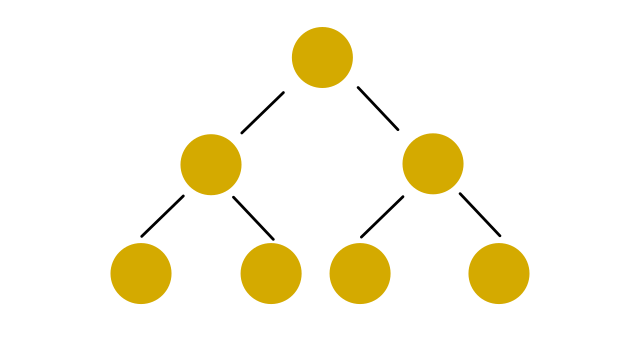

La cantidad máxima de nodos en un nivel parece depender de la cantidad de nodos inicial. Se sabe que la cantidad total de nodos es $n = 7$ En el último nivel se hallan cuatro nodos, luego dos, luego uno. La mitad de $7$ es $3.5$. Es posible trabajar con el redondeo de este valor y obtener que la mitad de la cantidad de nodos corresponde a la cantidad de nodos del último nivel $4$.

Se aplica este mismo razonamiento para el segundo nivel, deberían haber un cuarto de la cantidad de nodos del árbol. Esto se cumple pues $\text{ceil}(7/4) = 2$. 

Para el último nivel $h = 3$ se cumple la misma propiedad. La cantidad de nodos es la correspondiente al resultado de $\text{ceil}(7/8) = 1$.

Se concluye que la cantidad de nodos máxima dependiendo del nivel es:
$$
C(n,h) = \text{ceil}(\cfrac{n}{2^h}) = 1 + \text{floor}(\cfrac {n} {2^h})
$$

En el montículo binario la cantidad total de niveles es una variable que depende de la altura del árbol. Concretamente se calcula la altura $H(n) = \log_2(n)$. 



La función `maxHeap` trabaja desde el último nodo padre hacia atrás. Cuya posición es $\textit{LastParent} = round(n/2) - 1$. Este se encuentra en el segundo nivel $h$ del árbol. En cada nivel $h$ hay $C(n,h)$ elementos que serán reposicionados. 

$$
\sum_{h=2}^{H(n)} C(n,h)
$$

Donde el tiempo de la reposición es dependiente de la altura $O(h)$. Donde se realizan $h-1$ intercambios. Por lo que el tiempo total de `maxHeap` es equivalente a:

$$
\sum_{h=2}^{H(n)} (h-1) \cdot C(n,h) = 
\sum_{h=2}^{H(n)} (h-1) \cfrac n {2^h} = 
n\sum_{h=1}^{H(n)}  \cfrac h {2^{h+1}} = 
$$
$$
\cfrac n  2 \sum_{h=1}^{H(n)}  \cfrac h {2^{h}}  =
\cfrac n  2 \sum_{h=0}^{H(n)}  \cfrac h {2^{h}}  
$$

Cualquier sumatoria finita es menor que su sumatoria infinita. Por lo que:
$$
\cfrac n  2 \sum_{h=0}^{H(n)}  \cfrac h {2^{h}}  < 
\cfrac n  2 \sum_{h=0}^{\infty}  \cfrac h {2^{h}}  
$$

Se aplica la siguiente ecuación:

$$
\cfrac {\delta} {\delta x}\left[ \sum_{h = 0} ^ \infty x^h \right ] = 
\cfrac {\delta} {\delta x} \left [ \cfrac 1 {1-x} \right ] =
\cfrac 1 {(1-x^2)}
$$

Con $x$ = $1/2$ Se obtiene que:

$$
\cfrac n  2 \sum_{h=0}^{H(n)}  \cfrac h {2^{h}}  <  
\cfrac n 4 \cdot \cfrac 1 {\left(1 - {\left(\cfrac 1 2 \right)}\right)^2}
$$

$$
\cfrac n  2 \sum_{h=0}^{H(n)}  \cfrac h {2^{h}}  <  
\cfrac n 4 \cdot \cfrac 1 {\left (\cfrac 1 4\right )}
$$

$$
\cfrac n  2 \sum_{h=0}^{H(n)}  \cfrac h {2^{h}}  \leq  
\cfrac n 4 \cdot 4
$$

$$
T(n) <  
n
$$

Siendo la cota superior ajustada de maxHeap $O(n)$.

### 5.3 Tiempo de ejecución de HeapSort

En el peor caso HeapSort deberá llevar cada nodo raíz hasta el primer nivel del árbol pasando por $H(n)$ nodos antes de llegar a la posición objetivo. Sabemos que el tamaño del Heap es reducido en uno en cada iteración. De esto es posible inferir que

$$
T(n) \leq \sum_{k = 1}^n log_2(k)
$$

Sabiendo que $\log_2 a + \log_2 b = \log_2(ab)$

$$
T(n) \leq log_2(n!):
$$

Sabiendo que $n! < n^n$

$$
T(n) < log_2(n^n)
$$

Sabiendo que $\log_2(k^c) =  c \cdot \log_2 (k)$

$$
T(n) < O\left(n \cdot \log(n)\right)
$$

## 6. Correctitud del algoritmo

### 6.1 Correctitud maxHeap

Dado un arreglo $K$ de largo $n$.

**Invariabilidad del bucle**: Cada nodo hijo $L: 2i + 1$ y $R: 2i + 2$ es raíz
de un montículo máximo

**Inicialización**: Iniciamos en $i = K_{LastParent} = n//2 - 1$. Los elementos
$L$ y $R$ No tienen hijos por lo que son montículos máximos de un sólo elemento.

**Mantenimiento**: LLamamos a reubicar($i$). Esto compara el padre con sus hijos y lleva al padre a la ubicación que cumple la propiedad del montículo de máximos. Dados dos casos.

El elemento $K_i$ es mayor a sus hijos. Se cumple la invariante y se decrementa el valor de $i$..

El elemento $K_i$ es menor a sus hijos. Intercambiamos posición con el 
hijo mayor y llamamos a reubicar($L||R$). Efectivamente formando un montículo máximo en la posición $i$ y en sus nodos hijos $L$ y $R$. Se decrementa en $1$ el valor de $i$.

**Finalización**: El valor de $i$ llega a 0. El nodo raíz es mayor que sus hijos y sus hijos son submontículos máximos.



### 6.2 Correctitud heapSort


Con la seguridad de que el montículo máximo es formado correctamente definimos una invariante de bucle. Iterando con $i$ desde 0 hasta $n-1$.

**Propiedad invariante de bucle**: El subarreglo $A[K_{n-i}...K{n}]$ está ordenado correctamente. El subarreglo $A[K_0...K{n-i}]$ es un montículo de máximos.

**Inicialización**: El valor de $i = 0$. Por lo que el subarreglo $A[K_n..K_n]$ no tiene elementos y el submontículo $A[K_0... K_n]$ es el formado al inicio del algoritmo.

**Mantenimiento**: Se intercambia el elemento $K_0$ con el elemento $K_{n-i}$ para luego eliminar el elemento $K_{n-i}$ del montículo. El subarreglo ordenado $A[K_{n-i}..K_n]$ adquiere un elemento ordenado en su inicio. Se incrementa el valor de $i$.

**Finalización**: $i = n$ por lo que el montículo no tiene elementos y el subarreglo ordenado corresponde a la totalidad del arreglo inicial.

## 7. Experimentos

In [ ]:
from matplotlib import pyplot as plt
import random
from timeit import repeat

### 7.1 Comparación con MergeSort

A continuación se compara el tiempo de ejecución de dos implementaciones de los algoritmos Heap Sort y Merge Sort con un arreglo aleatorio cuyo tamaño es aumentado progresivamente. El eje $x$ indica el tamaño del arreglo y el eje $y$ Indica el tiempo en milisegundos de ejecución. Para el muestreo se toma el mejor tiempo de 10 intentos para evitar variaciones por variaciones en la carga del procesador del computador que genera el gráfico.

In [ ]:
#@markdown Implementación Merge sort
# Python program for implementation of MergeSort
def mergeSort(arr):
    if len(arr) > 1:
  
         # Finding the mid of the array
        mid = len(arr)//2
  
        # Dividing the array elements
        L = arr[:mid]
  
        # into 2 halves
        R = arr[mid:]
  
        # Sorting the first half
        mergeSort(L)
  
        # Sorting the second half
        mergeSort(R)
  
        i = j = k = 0
  
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
  
        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
  
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
 # This code is contributed by Mayank Khanna 

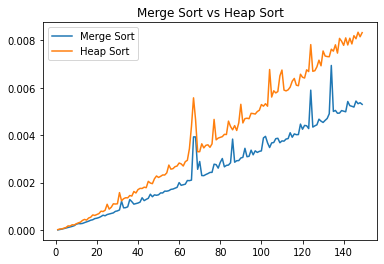

In [ ]:
#@markdown Código gráfico
samples = 150

x = list(range(1,samples))
# Merge Sort Y - axis
y_ms = []
# Heap Sort Y - axis
y_hs = []


for i in range(1,samples):
  arr = random.sample(range(-samples, samples), i)
  t_ms = repeat(
      setup="from __main__ import mergeSort as ms",
      stmt = f"ms({arr})", repeat = 1, number = 10
      )
  y_ms.append(t_ms);
  t_hs  = repeat(
      setup = "from __main__ import heap_sort as hs",
      stmt = f"hs({arr})", repeat = 1, number = 10
  )
  y_hs.append(t_hs)
plt.plot(x,y_ms)  
plt.plot(x,y_hs)  
plt.legend(["Merge Sort", "Heap Sort"])
plt.title("Merge Sort vs Heap Sort")
plt.show()

Si bien tanto como la cota superior asintótica es equivalente para Heap y Merge Sort $O(nlog(n))$. Se presentan variaciones en el tiempo de ejecución, el algoritmo Merge Sort es ligeramente más rápido para arreglos aleatorios y el factor de crecimiento de ambas funciones es el mismo.

Las variaciones alrededor de los puntos 70, 120 y 140 son debidos a fluctuaciones en la carga de trabajo de la máquina virtual de Google Colaboratory correspondientes al servidor Jupyter.

### 7.2 Comparación entre intercambios del mejor y el peor caso

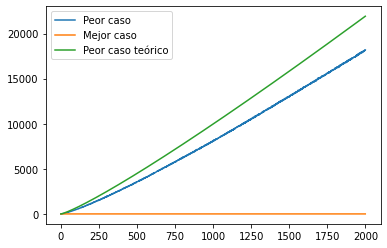

In [ ]:
#@markdown Código gráfico
from math import log2
samples = 2000
# Eje X del gráfico
x = list(range(1,samples))

# Eje Y del mejor caso teórico. El cual es O(n)
mejor_caso_teorico = [n for n in range(1,samples)]

# Eje Y del peor caso teórico.
peor_caso_teorico = [n * log2(n) for n in range(1, samples)]

# Almacena la cuenta del peor caso (Arreglo aleatorio)
compare_peor = []
# Almacena la cuenta del mejor caso (Arreglo con elementos repetidos)
compare_mejor = []

# Repetimos para la cantidad de muestrar
for i in range(1,samples):
  #print(i)
  # Creamos el arreglo aleatorio de tamaño "i"
  arr_peor = random.sample(range(-samples, samples), i)
  # Creamos el arreglo de elementos repetidos de tamaño "i"
  arr_mejor = [i for n in range(1, i)]
  # reseteamos el contador de comparaciones
  compareCount = 0
  nullptr = None
  # Ordenamos el caso aleatorio
  nullptr, compareCount = heap_sort(arr_peor, verbose = False, count = True)
  # Lo guardamos
  compare_peor.append(compareCount)
  # reseteamos el contador de comparaciones
  compareCount = -1
  # Ordenamos el caso de elementos repetidos
  nullptr, compareCount = heap_sort(arr_mejor, verbose = False, count = True)
  # Lo guardamos
  compare_mejor.append(compareCount)
 
plt.plot(x,compare_peor)  
plt.plot(x,compare_mejor)  
plt.plot(x,peor_caso_teorico)  
plt.legend(["Peor caso", "Mejor caso",
            "Peor caso teórico"
            ])
plt.show()

Este experimento comprueba que el número de intercambios está siempre debajo de la cota superior anteriormente mencionada $O(n\cdot \log (n))$. Además revela que en el mejor caso el número de intercambios se mantiene constante. Esto es debido a que en cada llamada a reubicar el nodo no será menor que sus hijos. Por ende no se realiza ningún intercambio.

## 8. Conclusiones

El algoritmo Heap Sort es ligeramente más lento que otros algoritmos con la misma complejidad temporal para casos generales/aleatorios. Este podría ser útil en el caso que el menor (o mayor) valor del arreglo sea requerido con urgencia. Tiene la ventaja de tener una complejidad espacial constante $O(1)$ puesto que trabaja dentro del mismo arreglo. Puede ser utilizado para evitar el peor caso de Quick Sort. Trabaja igual para todos los arreglos por lo que garantiza un tiempo $O(n \cdot log (n))$. A diferencia de otros algoritmos.

Es fácil de implementar una vez comprendido el funcionamiento del montículo de máximos. Su estructura permite una explicación gráfica intuitiva. Aunque puede llegar a ser un poco complicado de reparar en caso de un mal funcionamiento debido a que para interpretar el montículo este es generalmente graficado (ya sea dentro del ordenador o a mano). 
